## import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load the data

In [2]:
df = pd.read_csv('./crime_std.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,0.746988,0.654110,0.440678,0.359173
1,1,0.554217,0.746575,0.271186,0.961240
2,2,0.439759,0.852740,0.813559,0.612403
3,3,0.481928,0.496575,0.305085,0.315245
4,4,0.493976,0.791096,1.000000,0.860465


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     int64  
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     float64
 3   UrbanPop    50 non-null     float64
 4   Rape        50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


In [5]:
df.describe()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,0.420964,0.430685,0.568475,0.360000
std,14.57738,0.262380,0.285403,0.245335,0.242025
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,12.25000,0.197289,0.219178,0.381356,0.200904
50%,24.50000,0.388554,0.390411,0.576271,0.330749
75%,36.75000,0.629518,0.698630,0.775424,0.487726
max,49.00000,1.000000,1.000000,1.000000,1.000000


## Data Pre-processing

In [6]:
df.drop(['Unnamed: 0'], axis=1 , inplace=True)

In [7]:
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

## Create hierarchical clusters

In [8]:
from scipy.cluster import hierarchy

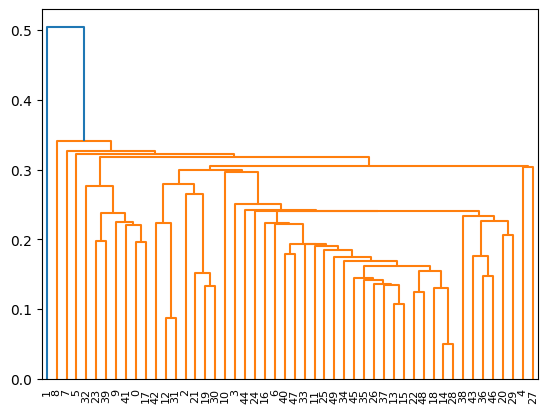

In [9]:
# use single likage for creating hiearchies
linkage = hierarchy.linkage(df, 'single')

# create dendrogram using linkage
clusters_info = hierarchy.dendrogram(linkage)

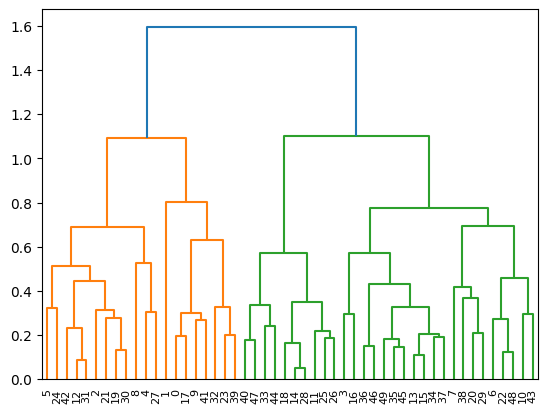

In [10]:
# use single likage for creating hiearchies
linkage = hierarchy.linkage(df, 'complete')

# create dendrogram using linkage
clusters_info = hierarchy.dendrogram(linkage)

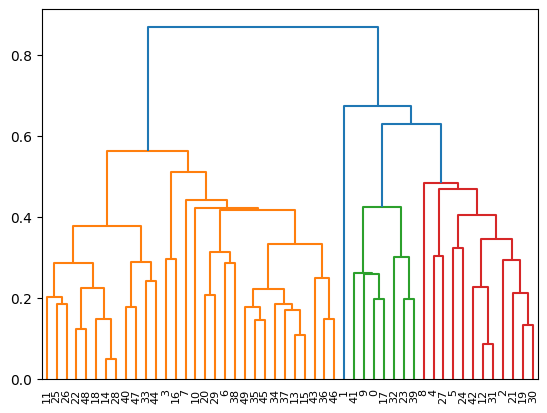

In [11]:
# use single likage for creating hiearchies
linkage = hierarchy.linkage(df, 'average')

# create dendrogram using linkage
clusters_info = hierarchy.dendrogram(linkage)

## using Sci-Kit Learn

In [12]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, linkage='complete')

# fit the data
model.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [13]:
model.n_clusters_

5

In [14]:
model.labels_

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

Text(0, 0.5, 'Spending Score')

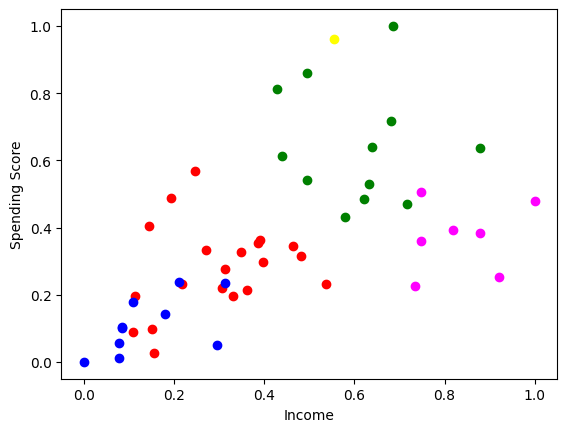

In [17]:

# create a figure using plt
figure = plt.figure()

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    plt.scatter(df['Murder'][model.labels_ == index], df['Rape'][model.labels_ == index], color=colors[index])

plt.xlabel('Murder')
plt.ylabel('Rape')

Text(0.5, 0.5, 'Rape')

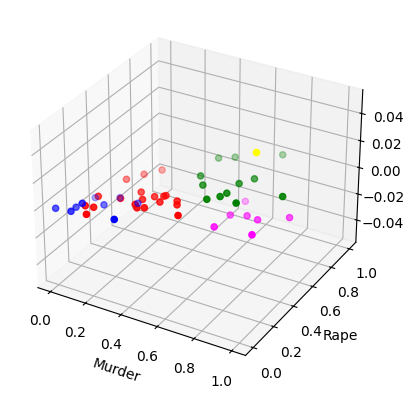

In [18]:

# create a figure using plt
figure = plt.figure()

# add a subplot
ax = figure.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    ax.scatter(df['Murder'][model.labels_ == index], df['Rape'][model.labels_ == index], color=colors[index])

plt.xlabel('Murder')
plt.ylabel('Rape')

In [51]:
from sklearn.cluster import DBSCAN

# create an object of DBScan
model = DBSCAN(eps=0.2, min_samples=3)

# fit the data
model.fit(df)

DBSCAN(eps=0.2, min_samples=3)

In [52]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0])